# Multiclass Text Classification

In [18]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import re

In [21]:
dataset = fetch_20newsgroups()

In [22]:
features = dataset.data
target = dataset.target

In [23]:
dataset = pd.DataFrame({'features':features})

In [25]:
# Lowering

In [26]:
dataset['features'] = dataset['features'].apply(lambda x: x.lower())

In [27]:
# removing characters which are not alphanumeric

In [28]:
dataset['features'] = dataset['features'].apply(lambda x: re.sub(r'[^\w\s]+', ' ',x))

In [30]:
# Removing stopwords

In [31]:
from nltk.corpus import stopwords

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [34]:
stp = stopwords.words('english')

In [35]:
dataset['features'] = dataset['features'].apply(lambda x:' '.join([word for word in x.split() if word not in stp]))

In [37]:
# Stemming

In [38]:
from nltk.stem import SnowballStemmer

In [41]:
stemmer = SnowballStemmer('english')

In [42]:
dataset['features'] = dataset['features'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [43]:
# Lemmatization

In [45]:
from textblob import Word

In [46]:
dataset['features'] = dataset['features'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))

# Text to features

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [70]:
tfidf = TfidfVectorizer()

In [71]:
features = tfidf.fit_transform(dataset['features'])

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.1,shuffle=True)

In [74]:
from sklearn.linear_model import SGDClassifier

In [75]:
sgd = SGDClassifier()

In [76]:
sgd.fit(X_train,y_train)

SGDClassifier()

In [77]:
y_pred = sgd.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(y_test,y_pred)

0.9257950530035336

In [66]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [67]:
pac = PassiveAggressiveClassifier()

In [69]:
pac.fit(X_train,y_train)

y_pred = pac.predict(X_test)

accuracy_score(y_test,y_pred)

0.911660777385159

# Carrying out sentiment analysis

In [149]:
path = r"C:\Users\surie\Books to notebooks\Apress NLP Recipes\Reviews.csv\Reviews.csv"

In [150]:
dataset = pd.read_csv(path)

In [151]:
dataset = dataset[['Text', 'Score']]

In [153]:
dataset = dataset[:10000]

In [154]:
# Remove punctuation and lowercase

In [155]:
dataset['Text'] = dataset['Text'].apply(lambda x: x.lower())

In [156]:
dataset['Text'] = dataset['Text'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))

In [157]:
# remove stopwords

In [158]:
import nltk

In [159]:
stp = nltk.corpus.stopwords.words('english')

In [160]:
dataset['Text'] = dataset['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stp]))

In [161]:
# Stemming

In [162]:
from nltk.stem import PorterStemmer

In [163]:
stmr = PorterStemmer()

In [164]:
dataset['Text'] = dataset['Text'].apply(lambda x: ' '.join([stmr.stem(word) for word in x.split()]))

In [166]:
# See Score Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028C7B032670>]],
      dtype=object)

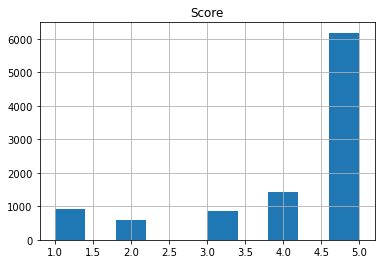

In [170]:
dataset.hist(bins=10)

In [171]:
# Need to sample dataset

In [175]:
dataset['Score'].value_counts()

5    6183
4    1433
1     932
3     862
2     590
Name: Score, dtype: int64

In [176]:
num_samples = 6183

In [178]:
score1 = dataset[dataset['Score'] == 1].sample(num_samples,replace=True)

In [199]:
score2 = dataset[dataset['Score'] == 2].sample(num_samples,replace=True)

In [200]:
score3 = dataset[dataset['Score'] == 3].sample(num_samples,replace=True)

In [201]:
score4 = dataset[dataset['Score'] == 4].sample(num_samples,replace=True)

In [202]:
score5 = dataset[dataset['Score'] == 5].sample(num_samples,replace=True)

In [203]:
dataset = pd.concat([score1,score2,score3,score4,score5],axis=0)

In [205]:
from sklearn.utils import shuffle

In [206]:
dataset = shuffle(dataset)

In [208]:
# Katla.

In [209]:
# They are using 

In [215]:
#!pip install vaderSentiment

In [216]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [217]:
analyzer = SentimentIntensityAnalyzer()

In [222]:
dataset['Text'][:1].tolist()

['coconut water hint pineappl ship us indonesia packag usual non recycl dispos contain cater sport drink market good sourc electrolyt br br took 8 5 ounc contain pour 6 serv 4 teenag 2 adult first impress teen seriou athlet told drink mention market potenti sport drink br br result neg vote one would choos exist drink everyon recogn pineappl flavor instantli leav strang feel mouth one teen said probabl coconut water residu flavor feel br br straw includ packag open pour need assist fork knife mostli cane sugar water bother br br biggest issu wast coconut sugar water indonesia carbon footprint product contain 2 recycl symbol like milk carton difficult find commun actual keep landfil br br bottom line tasti littl sugar water transport packag wast realli fit cultur focus sustain']

In [223]:
analyzer.polarity_scores(dataset['Text'][:1].tolist())

{'neg': 0.035, 'neu': 0.888, 'pos': 0.077, 'compound': 0.7096}

# Summarizing Text Data Using TextRank

In [1]:
from gensim.summarization.summarizer import summarize

In [7]:
from gensim.summarization import summarize

In [8]:
from gensim.summarization import keywords

In [9]:
text =  '''(\'Natural language processing - Wikipedia\',
\'Natural language processing (NLP) is an area of computer
science and artificial intelligence concerned with the
interactions between computers and human (natural) languages,
in particular how to program computers to process and analyze
large amounts of natural language\\xa0data.\\n Challenges
in natural language processing frequently involve speech
recognition, natural language understanding, and natural
language generation.\\n The history of natural language
processing generally started in the 1950s, although work can be
found from earlier periods.\\nIn 1950, Alan Turing published
an article titled "Intelligence" which proposed what is now
called the Turing test as a criterion of intelligence.\\n
The Georgetown experiment in 1954 involved fully automatic
translation of more than sixty Russian sentences into English.
The authors claimed that within three or five years, machine
translation would be a solved problem.[2] However, real
progress was '''

In [10]:
summarize(str(text),ratio=0.2)

"('Natural language processing - Wikipedia',\nin natural language processing frequently involve speech\ncalled the Turing test as a criterion of intelligence.\\n"